In [1]:
from solver import *
from ai import *
import pandas as pd
import numpy as np

#### Test Solver

In [2]:
df = pd.read_csv('../Omega2020/data/dataset.csv').drop('Unnamed: 0', axis=1)
df = df.drop(df[df.Level == 'TEST'].index)
# df = df['Level'].drop("TEST", axis=0)
df.head()

,Id,Sudoku,Solution,Level,People,Average-Time
0,0,8...74...1.........7.5.9.4....65.4..73.....296...,8591742361648325973725698412916574837354186296...,Diabolical,254,25
1,1,.5.....7.9......6...21.75.8.4..69.3...8...4......,8539461729175823644621375981458692376283754197...,Moderate,281,12
2,2,...45.2..3.........8....4..7...94.3.9..5.2.76....,6974532183248617955819274637186945329435128762...,Diabolical,265,22
3,3,9......31.3...8.....5.7.9..3...4...8.916..54.4...,9274568316341982758153729643527496187916835424...,Tough,279,19
4,4,9.......2784.1.5.....4.....2.53.1.7...7...8......,9615387427846125395234796182953814761479568236...,Moderate,301,14


In [3]:
def conv_values(grid):
     return dict(zip(boxes, ["123456789" if element == "." else element for element in grid]))

In [4]:
df['Sudoku'][0]

'8...74...1.........7.5.9.4....65.4..73.....296.8.......2.3.1.5.........8...9....2'

In [5]:
import json
a=solve(df['Sudoku'][0])
a

FileNotFoundError: [Errno 2] No such file or directory: 'difficulty_level_model'

In [6]:
test1 = '88..74...1.........7.5.9.4....65.4..73.....296.8.......2.3.1.5.........8...9....2'
test2 = '.5.....7.9......6...21.75.8.4..69.3...8...4...3.42..5.3.12.86...9......1.8.....2.'
test3 = '8...74...1.........7.5.9.4....65.4..73.....296.8.......2.3.1.5.........8...9....2'
test_triple = '...29438....17864.48.3561....48375.1...4157..5..629834953782416126543978.4.961253'
test_triple2='4..5..37.32......4.........8....2.3.21.84...........9..7..9.1..94.651.......7....'
test_triple3='39....7........65.5.7...349.4938.5.66.1.54983853...4..9..8..134..294.8654.....297'
test_rob='...2....58....9..4...18..2.3.....5.95......7..6.....4.........6..1.3498.92.85...3'
rob_example2='...5.47..7.3.....3.....6.2..7..2..639.......543..1..7..5.2...........2.8...9.1...'
names_tests= ['test2','test3','test_triple','test_triple2','test_triple3','test_rob','rob_example2']
tests= [test2,test3,test_triple,test_triple2,test_triple3,test_rob,rob_example2]
# tests= [test2,test3,test_triple,test_triple3,test_rob]

In [7]:
values=dict(zip(boxes, ["123456789" if element == "." else element for element in test2 ]))

a= tracker(conv_values(test2))
a

array([7, 6, 0, 0, 0])

In [8]:
count =0

for test in tests:
    values=dict(zip(boxes, ["123456789" if element == "." else element for element in test]))
    print(names_tests[count], tracker(values),'\n')
#     print(solve(test)[1])
    count+=1

test2 [7 6 0 0 0] 

test3 [23  8  2  0  3] 

test_triple [15  4  0  0  1] 

test_triple2 [16  7  2  0  4] 

test_triple3 [10  8  0  1  0] 

test_rob [16  6  2  0  1] 

rob_example2 [24 11  4  0  5] 



In [9]:
df['Tracker'] = df['Sudoku'].apply(lambda x: tracker(conv_values(x)))

In [12]:
df.head()

,Id,Sudoku,Solution,Level,People,Average-Time,Tracker,Single,Candidate,Twins,Triples,Guess
0,0,8...74...1.........7.5.9.4....65.4..73.....296...,8591742361648325973725698412916574837354186296...,Diabolical,254,25,"[23, 8, 2, 0, 3]",23,8,2,0,3
1,1,.5.....7.9......6...21.75.8.4..69.3...8...4......,8539461729175823644621375981458692376283754197...,Moderate,281,12,"[7, 6, 0, 0, 0]",7,6,0,0,0
2,2,...45.2..3.........8....4..7...94.3.9..5.2.76....,6974532183248617955819274637186945329435128762...,Diabolical,265,22,"[11, 7, 2, 0, 2]",11,7,2,0,2
3,3,9......31.3...8.....5.7.9..3...4...8.916..54.4...,9274568316341982758153729643527496187916835424...,Tough,279,19,"[9, 9, 2, 0, 0]",9,9,2,0,0
4,4,9.......2784.1.5.....4.....2.53.1.7...7...8......,9615387427846125395234796182953814761479568236...,Moderate,301,14,"[6, 6, 1, 0, 0]",6,6,1,0,0


In [11]:
df[['Single', 'Candidate', 'Twins', 'Triples', 'Guess']]=  pd.DataFrame(df['Tracker'].values.tolist(), index= df.index)

In [23]:
df2=df[['Level','Single', 'Candidate', 'Twins','Triples', 'Guess']].groupby('Level').sum().reset_index()

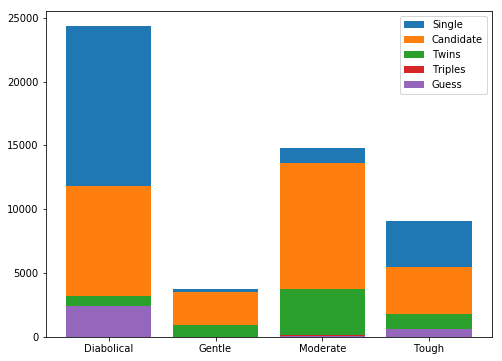

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6))
ax.bar(df2['Level'], df2['Single'],label='Single')
ax.bar(df2['Level'], df2['Candidate'] ,label='Candidate')
ax.bar(df2['Level'], df2['Twins'],label='Twins')
ax.bar(df2['Level'], df2['Triples'],label='Triples')
ax.bar(df2['Level'], df2['Guess'],label='Guess')
plt.legend()
plt.show();

In [18]:
from sklearn.model_selection import train_test_split
target =['Level']
features = ['Single','Candidate','Twins','Triples','Guess']
y = df[target]
X= df[features]
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [19]:
 X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((3218, 5), (1006, 5), (805, 5), (3218, 1), (1006, 1), (805, 1))

In [20]:
# from sklearn import preprocessing
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import log_loss


# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score, GridSearchCV
# from sklearn.tree import DecisionTreeClassifier


In [24]:
# l = LogisticRegression()
# r = RandomForestClassifier(n_estimators=25,max_depth=10)
# # for i in range(X_train_ordinal.shape[1]):
# #     le = preprocessing.LabelEncoder()
# #     le.fit(X_train,y_train])
# #     les.append(le)
# #     X_train_ordinal[:, i] = le.transform(X_train_ordinal[:, i])
# #     X_test_ordinal[:, i] = le.transform(X_test_ordinal[:, i])
# l.fit(X_train,y_train)
# y_pred = l.predict_proba(X_test)
# print(log_loss(y_test,y_pred))


In [22]:
# y_pred

array([[4.20467091e-02, 5.52358674e-02, 5.74824918e-01, 3.27892505e-01],
       [6.15821910e-02, 2.59487393e-02, 6.14084295e-01, 2.98384775e-01],
       [5.85791299e-01, 6.45775374e-05, 1.16234073e-01, 2.97910051e-01],
       ...,
       [4.83002363e-01, 3.93780178e-03, 1.17345385e-01, 3.95714450e-01],
       [4.03720572e-02, 4.57246162e-01, 4.65299154e-01, 3.70826267e-02],
       [7.60177592e-02, 7.05464010e-02, 6.71314186e-01, 1.82121654e-01]])

In [26]:
# r.fit(X_train,y_train)
# y_pred = r.predict_proba(X_test)
# print(log_loss(y_test,y_pred))

In [25]:
# cv_score = cross_val_score(LogisticRegression(), 
#                             X_train, y_train,
#                             scoring = 'accuracy',
#                             cv = 3,
#                             n_jobs = -1,
#                             verbose = 1)

In [27]:
# cv_score

In [28]:
# clf = DecisionTreeClassifier()
# cv_score_clf = cross_val_score(clf, 
#                             X_train, y_train,
#                             scoring = 'accuracy',
#                             cv = 3,
#                             n_jobs = -1,
#                             verbose = 1)
# cv_score_clf

In [29]:
# clf.fit(X_train, y_train)

In [30]:
# y_pred = clf.predict(X_test)
# y_pred

In [31]:
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

In [32]:
# param_grid = {
#     'n_estimators': [10, 20, 30],
#     'max_depth': [6, 10, 20, 30]
# }
# gridsearch = GridSearchCV(RandomForestClassifier(n_jobs = -1), 
#                           param_grid=param_grid, 
#                           scoring='accuracy', cv=3, 
#                           return_train_score=True, verbose=10)
# gridsearch.fit(X_train, y_train.values.ravel())

In [33]:
# RandomForestClassifier().get_params().keys()

In [34]:
# pd.DataFrame(gridsearch.cv_results_).sort_values( \
#                                          by='rank_test_score')

In [35]:
# clf = RandomForestClassifier(max_depth = 6, 
#                              n_estimators = 30, 
#                              n_jobs = -1)
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

In [36]:
# y_pred=clf.predict(X_test)

In [37]:
# y_pred

In [38]:
# result= y_test
# y_array = y_test.to_numpy()
# result['y_pred']=y_pred
# result.head()

In [39]:
# result['Correct']=result['Level']==result['y_pred']

In [40]:
# result[result['Correct']==False]

In [41]:
# len(list(y_pred))

In [42]:
# len(y_test)

In [43]:
# df.shape

In [44]:
# target2 =['Level']
# features2 = ['Single','Candidate','Twins','Triples','Guess']
# df2 = df.drop(df[df.Level == ('Gentle')].index)
# df2 = df2.drop(df2[df2.Level == ('TEST')].index)
# y = df2[target2]
# X= df2[features2]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# df2.shape

In [46]:
# df3= df2.drop(['Sudoku','Id','Solution','Tracker','Iterations','People', 'Average-Time'], axis=1)
# df3 = df3.replace({'Gentle': 1, 'Moderate': 2, 'Tough': 3,'Diabolical': 4})

In [47]:
# df3.corr()

In [48]:
# clf = RandomForestClassifier(max_depth = 6, 
#                              n_estimators = 30, 
#                              n_jobs = -1)
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

In [49]:
# y_pred=clf.predict(X_test)

In [50]:
# result= y_test
# result['y_pred']=y_pred
# result.head()

In [51]:
# result['Correct']=result['Level']==result['y_pred']
# incorrect=result[result['Correct']==False]

In [52]:
# incorrect

In [53]:
# df.head()

In [54]:
# diabolical=df[df['Level']=='Diabolical']
# gentle=df[df['Level']=='Gentle']
# moderate=df[df['Level']=='Moderate']
# tough=df[df['Level']=='Tough']

In [55]:
# gentle.shape

In [56]:
# # condition= df[(df['Twins']==0) & (df['Triples']==0)& (df['Guess']==0)]
# condition= df[(df['Triples']==0)& (df['Guess']==0)]
# condition['Level'].value_counts()

In [57]:
# df.groupby('Level').sum().reset_index()

In [59]:
df2=df[['Level','Single', 'Candidate', 'Twins','Triples', 'Guess']].groupby('Level').sum().reset_index()
df2

,Level,Single,Candidate,Twins,Triples,Guess
0,Diabolical,24339,11778,3229,76,2379
1,Gentle,3753,3520,895,23,0
2,Moderate,14772,13609,3719,109,54
3,Tough,9088,5482,1804,52,640


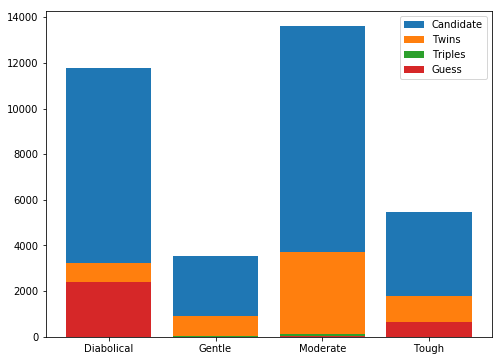

In [180]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6))
# ax.bar(df2['Level'], df2['Single'],label='Single')
ax.bar(df2['Level'], df2['Candidate'] ,label='Candidate')
ax.bar(df2['Level'], df2['Twins'],label='Twins')
ax.bar(df2['Level'], df2['Triples'],label='Triples')
ax.bar(df2['Level'], df2['Guess'],label='Guess')
plt.legend()
plt.show();

In [181]:
diabolical=df[df['Level']=='Diabolical']
gentle=df[df['Level']=='Gentle']
moderate=df[df['Level']=='Moderate']
tough=df[df['Level']=='Tough']

In [182]:
df2

,Level,Single,Candidate,Twins,Triples,Guess
0,Diabolical,24339,11778,3229,76,2379
1,Gentle,3753,3520,895,23,0
2,Moderate,14772,13609,3719,109,54
3,Tough,9088,5482,1804,52,640


In [183]:

def iterator33(values):
    single = 0
    candidate = 0
    twins = 0
    triples = 0
    guess=0
    stalled = False
    start=0
    primero='0'
    segundo='0'
    while not stalled:
        initial = transf(values)
#         print(initial)
        values_before = values.values()
        values = single_position(values)
        values_after = transf(values)
        single += (0 if values_before == values_after else 1) 

        
        values_before = values_after
        values = single_candidate(values)
        values_after = transf(values)
        candidate += (0 if values_before == values_after else 1)  
        if (start == 0) & (candidate==1):
            primero='candidate'
        if (start == 1) & (values_before != values_after):
            segundo='candidate'

        values_before = values_after
        values = naked_twins(values)
        values_after = transf(values)
        twins += (0 if values_before == values_after else 1)
        if (start == 0) & (candidate==0) & (twins==1):
            primero='twins'
        if (start == 1) & (values_before != values_after):
            segundo='twins'
        values_before = values_after
        values = naked_triple(values)
        values_after = transf(values)
        triples += (0 if values_before == values_after else 1)
        if (start == 0) & (candidate==0) & (twins==0)& (triples==1):
            primero='triples'
        if (start == 1) & (values_before != values_after):
            segundo='triples'
        solved_values = len([box for box in values.keys() if len(values[box]) == 1])
        if solved_values is 81:
            break
        if (solved_values !=  81) & (primero == '0'):
            primero = 'guess'
        if (start == 1)&(solved_values !=  81) & (initial == values_after):
            segundo = 'guess'    
        stalled = solved_values == 81    
        
        if initial == values_after: 
   
            start += 1
            aa = [(len(values[s]), s) for s in boxes if len(values[s]) > 1]
            if len(aa) is 0:
                pass
            if len(aa) > 0:
                guess +=1
                _,s = min(aa)
                for value in values[s]:
                    new_sudoku = values.copy()
                    new_sudoku[s] = value
                    values = new_sudoku
            if start is 10:
                break


#     return([single, candidate, twins, triples, guess, start, solved_values])
    return([single, candidate, twins, triples, guess, primero,segundo])

In [184]:
count =0

for test in tests:
    values=dict(zip(boxes, ["123456789" if element == "." else element for element in test]))
    print(names_tests[count], iterator33(values))
#     print(solve(test)[1])
    count+=1

test2 [7, 6, 0, 0, 0, 'candidate', '0']
test3 [23, 8, 2, 0, 3, 'candidate', 'guess']
test_triple [15, 4, 0, 0, 1, 'guess', 'guess']
test_triple2 [16, 7, 2, 0, 4, 'guess', 'guess']
test_triple3 [10, 8, 0, 1, 0, 'candidate', '0']
test_rob [16, 6, 2, 0, 1, 'candidate', 'guess']
rob_example2 [24, 11, 4, 0, 5, 'candidate', 'guess']


In [185]:
##second analisys
df_copy=df.copy()
df_copy['Tracker'] = df_copy['Sudoku'].apply(lambda x: iterator33(conv_values(x)))

In [186]:
df_copy[['Single', 'Candidate', 'Twins', 'Triples', 'Guess','Primero','Segundo']]=  pd.DataFrame(df_copy['Tracker'].values.tolist(), index= df.index)

In [187]:
# # df_copy[['Level','Primero']]
# df_copy[df_copy['Primero']!='NO']
df_copy.head()

,Id,Sudoku,Solution,Level,People,Average-Time,Tracker,Single,Candidate,Twins,Triples,Guess,Iterations,Primero,Segundo
0,0,8...74...1.........7.5.9.4....65.4..73.....296...,8591742361648325973725698412916574837354186296...,Diabolical,254,25,"[23, 8, 2, 0, 3, candidate, guess]",23,8,2,0,3,36,candidate,guess
1,1,.5.....7.9......6...21.75.8.4..69.3...8...4......,8539461729175823644621375981458692376283754197...,Moderate,281,12,"[7, 6, 0, 0, 0, candidate, 0]",7,6,0,0,0,13,candidate,0
2,2,...45.2..3.........8....4..7...94.3.9..5.2.76....,6974532183248617955819274637186945329435128762...,Diabolical,265,22,"[11, 7, 2, 0, 2, candidate, guess]",11,7,2,0,2,22,candidate,guess
3,3,9......31.3...8.....5.7.9..3...4...8.916..54.4...,9274568316341982758153729643527496187916835424...,Tough,279,19,"[9, 9, 2, 0, 0, candidate, 0]",9,9,2,0,0,20,candidate,0
4,4,9.......2784.1.5.....4.....2.53.1.7...7...8......,9615387427846125395234796182953814761479568236...,Moderate,301,14,"[6, 6, 1, 0, 0, candidate, 0]",6,6,1,0,0,13,candidate,0


In [188]:
diabolical=df_copy[df_copy['Level']=='Diabolical']
gentle=df_copy[df_copy['Level']=='Gentle']
moderate=df_copy[df_copy['Level']=='Moderate']
tough=df_copy[df_copy['Level']=='Tough']
diabolical.head()

,Id,Sudoku,Solution,Level,People,Average-Time,Tracker,Single,Candidate,Twins,Triples,Guess,Iterations,Primero,Segundo
0,0,8...74...1.........7.5.9.4....65.4..73.....296...,8591742361648325973725698412916574837354186296...,Diabolical,254,25,"[23, 8, 2, 0, 3, candidate, guess]",23,8,2,0,3,36,candidate,guess
2,2,...45.2..3.........8....4..7...94.3.9..5.2.76....,6974532183248617955819274637186945329435128762...,Diabolical,265,22,"[11, 7, 2, 0, 2, candidate, guess]",11,7,2,0,2,22,candidate,guess
7,7,..1.4.....8.....129...7...83.5.....4..6..72..4...,6215483975873694129342716583158269748964172354...,Diabolical,262,25,"[19, 7, 6, 0, 1, candidate, guess]",19,7,6,0,1,33,candidate,guess
9,9,5..73.....78.......2.5...9.1.......875..9..242...,5917364826784293153245817961492756387568931242...,Diabolical,253,27,"[12, 9, 3, 0, 1, candidate, candidate]",12,9,3,0,1,25,candidate,candidate
14,14,.6...3.7.....6.1.49.......3..97.45..7...1...9....,8641239753259671849175486232897345617462158391...,Diabolical,238,30,"[9, 8, 1, 0, 1, candidate, candidate]",9,8,1,0,1,19,candidate,candidate


In [189]:
df_copy['Primero'].value_counts()

candidate    5024
guess           3
twins           2
Name: Primero, dtype: int64

In [190]:
df_copy['Segundo'].value_counts()

0            3185
guess        1258
candidate     585
twins           1
Name: Segundo, dtype: int64

In [191]:
print('gentle',np.array(gentle['Iterations'].value_counts().index))
print("moderate",np.array(moderate['Iterations'].value_counts().index.sort_values()))
print('tough',np.array(tough['Iterations'].value_counts().index.sort_values()))
print('diabolical',np.array(diabolical['Iterations'].value_counts().index.sort_values()))


gentle [11 10 12 13  9 14  8 15 16  7 17  6 19 18 22]
moderate [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 39 46]
tough [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 53]
diabolical [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 51 52 55]


In [192]:
# import matplotlib.pyplot as plt
# import pandas as pd

# fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6))
# # ax.bar(df2['Level'], df2['Single'],label='Single')
# ax.bar(diabolical['Level'], diabolical['Candidate'] ,label='Candidate')
# ax.bar(diabolical['Level'], diabolical['Twins'],label='Twins')
# ax.bar(diabolical['Level'], diabolical['Triples'],label='Triples')
# ax.bar(diabolical['Level'], diabolical['Guess'],label='Guess')
# plt.legend()
# plt.show();

In [193]:
# df_copy['Iterations'].value_counts()

In [194]:
# diabolical['Guess'].value_counts()

In [195]:
a=[0,0,0]
b=[0,1,1]

np.add(a, b)

array([0, 1, 1])

In [196]:
def iterator44(values):
    stalled = False
    start=0
    answ=[0,0,0,0,0]
    while not stalled:
        initial = transf(values)
#         print(initial)
        values_before = values.values()
        values = single_position(values)
        values_after = transf(values)
        answ = (answ if values_before == values_after else np.add(answ, [1,0,0,0,0]))
        
        values_before = values_after
        values = single_candidate(values)
        values_after = transf(values)
        answ = (answ if values_before == values_after else np.add(answ, [0,1,0,0,0])) 

        values_before = values_after
        values = naked_twins(values)
        values_after = transf(values)
        answ = (answ if values_before == values_after else np.add(answ, [0,0,1,0,0])) 
        
        values_before = values_after
        values = naked_triple(values)
        values_after = transf(values)
        answ = (answ if values_before == values_after else np.add(answ, [0,0,0,1,0])) 
            
        solved_values = len([box for box in values.keys() if len(values[box]) == 1])
        if solved_values is 81:
            break
 
        stalled = solved_values == 81    
        
        if initial == values_after: 
            start += 1
            aa = [(len(values[s]), s) for s in boxes if len(values[s]) > 1]
            if len(aa) is 0:
                pass
            if len(aa) > 0:
                answ = np.add(answ, [0,0,0,0,1])
                _,s = min(aa)
                for value in values[s]:
                    new_sudoku = values.copy()
                    new_sudoku[s] = value
                    values = new_sudoku
            if start is 10:
                break
    return(answ)

In [197]:
count =0

for test in tests:
    values=dict(zip(boxes, ["123456789" if element == "." else element for element in test]))
    print(names_tests[count], iterator44(values))
#     print(solve(test)[1])
    count+=1

test2 [7 6 0 0 0]
test3 [23  8  2  0  3]
test_triple [15  4  0  0  1]
test_triple2 [16  7  2  0  4]
test_triple3 [10  8  0  1  0]
test_rob [16  6  2  0  1]
rob_example2 [24 11  4  0  5]


In [198]:
df3 = pd.read_csv('../Omega2020/data/dataset.csv').drop('Unnamed: 0', axis=1)
df3 = df3.drop(df3[df3.Level == 'TEST'].index)
df3.head()

,Id,Sudoku,Solution,Level,People,Average-Time
0,0,8...74...1.........7.5.9.4....65.4..73.....296...,8591742361648325973725698412916574837354186296...,Diabolical,254,25
1,1,.5.....7.9......6...21.75.8.4..69.3...8...4......,8539461729175823644621375981458692376283754197...,Moderate,281,12
2,2,...45.2..3.........8....4..7...94.3.9..5.2.76....,6974532183248617955819274637186945329435128762...,Diabolical,265,22
3,3,9......31.3...8.....5.7.9..3...4...8.916..54.4...,9274568316341982758153729643527496187916835424...,Tough,279,19
4,4,9.......2784.1.5.....4.....2.53.1.7...7...8......,9615387427846125395234796182953814761479568236...,Moderate,301,14


In [199]:
df3['Tracker'] = df3['Sudoku'].apply(lambda x: iterator44(conv_values(x)))

In [200]:
df3.head()

,Id,Sudoku,Solution,Level,People,Average-Time,Tracker
0,0,8...74...1.........7.5.9.4....65.4..73.....296...,8591742361648325973725698412916574837354186296...,Diabolical,254,25,"[23, 8, 2, 0, 3]"
1,1,.5.....7.9......6...21.75.8.4..69.3...8...4......,8539461729175823644621375981458692376283754197...,Moderate,281,12,"[7, 6, 0, 0, 0]"
2,2,...45.2..3.........8....4..7...94.3.9..5.2.76....,6974532183248617955819274637186945329435128762...,Diabolical,265,22,"[11, 7, 2, 0, 2]"
3,3,9......31.3...8.....5.7.9..3...4...8.916..54.4...,9274568316341982758153729643527496187916835424...,Tough,279,19,"[9, 9, 2, 0, 0]"
4,4,9.......2784.1.5.....4.....2.53.1.7...7...8......,9615387427846125395234796182953814761479568236...,Moderate,301,14,"[6, 6, 1, 0, 0]"


In [201]:
df3[['Single', 'Candidate', 'Twins', 'Triples', 'Guess']]=  pd.DataFrame(df3['Tracker'].values.tolist(), index= df.index)

In [202]:
df3.head()

,Id,Sudoku,Solution,Level,People,Average-Time,Tracker,Single,Candidate,Twins,Triples,Guess
0,0,8...74...1.........7.5.9.4....65.4..73.....296...,8591742361648325973725698412916574837354186296...,Diabolical,254,25,"[23, 8, 2, 0, 3]",23,8,2,0,3
1,1,.5.....7.9......6...21.75.8.4..69.3...8...4......,8539461729175823644621375981458692376283754197...,Moderate,281,12,"[7, 6, 0, 0, 0]",7,6,0,0,0
2,2,...45.2..3.........8....4..7...94.3.9..5.2.76....,6974532183248617955819274637186945329435128762...,Diabolical,265,22,"[11, 7, 2, 0, 2]",11,7,2,0,2
3,3,9......31.3...8.....5.7.9..3...4...8.916..54.4...,9274568316341982758153729643527496187916835424...,Tough,279,19,"[9, 9, 2, 0, 0]",9,9,2,0,0
4,4,9.......2784.1.5.....4.....2.53.1.7...7...8......,9615387427846125395234796182953814761479568236...,Moderate,301,14,"[6, 6, 1, 0, 0]",6,6,1,0,0


In [203]:
diabolical=df3[df3['Level']=='Diabolical']
gentle=df3[df3['Level']=='Gentle']
moderate=df3[df3['Level']=='Moderate']
tough=df3[df3['Level']=='Tough']
diabolical.head()

,Id,Sudoku,Solution,Level,People,Average-Time,Tracker,Single,Candidate,Twins,Triples,Guess
0,0,8...74...1.........7.5.9.4....65.4..73.....296...,8591742361648325973725698412916574837354186296...,Diabolical,254,25,"[23, 8, 2, 0, 3]",23,8,2,0,3
2,2,...45.2..3.........8....4..7...94.3.9..5.2.76....,6974532183248617955819274637186945329435128762...,Diabolical,265,22,"[11, 7, 2, 0, 2]",11,7,2,0,2
7,7,..1.4.....8.....129...7...83.5.....4..6..72..4...,6215483975873694129342716583158269748964172354...,Diabolical,262,25,"[19, 7, 6, 0, 1]",19,7,6,0,1
9,9,5..73.....78.......2.5...9.1.......875..9..242...,5917364826784293153245817961492756387568931242...,Diabolical,253,27,"[12, 9, 3, 0, 1]",12,9,3,0,1
14,14,.6...3.7.....6.1.49.......3..97.45..7...1...9....,8641239753259671849175486232897345617462158391...,Diabolical,238,30,"[9, 8, 1, 0, 1]",9,8,1,0,1


In [204]:
print('GENTLE:')
print('Guess',np.array(gentle['Guess'].value_counts().index))
print("Triples",np.array(gentle['Triples'].value_counts().index.sort_values()))
print('Twins',np.array(gentle['Twins'].value_counts().index.sort_values()))
print('Candidate',np.array(gentle['Candidate'].value_counts().index.sort_values()))

GENTLE:
Guess [0]
Triples [0 1]
Twins [0 1 2 3 4]
Candidate [ 2  3  4  5  6  7  8 10]


In [205]:
print('Moderate:')
print('Guess',np.array(moderate['Guess'].value_counts().index))
print("Triples",np.array(moderate['Triples'].value_counts().index.sort_values()))
print('Twins',np.array(moderate['Twins'].value_counts().index.sort_values()))
print('Candidate',np.array(moderate['Candidate'].value_counts().index.sort_values()))

Moderate:
Guess [0 1 2 3 5]
Triples [0 1 2]
Twins [0 1 2 3 4 5 6]
Candidate [ 3  4  5  6  7  8  9 10 11 12]


In [206]:
print('Tough:')
print('Guess',np.array(tough['Guess'].value_counts().index))
print("Triples",np.array(tough['Triples'].value_counts().index.sort_values()))
print('Twins',np.array(tough['Twins'].value_counts().index.sort_values()))
print('Candidate',np.array(tough['Candidate'].value_counts().index.sort_values()))

Tough:
Guess [0 1 2 3 4 5 6]
Triples [0 1 2]
Twins [0 1 2 3 4 5 6 7]
Candidate [ 4  5  6  7  8  9 10 11 12 13]


In [207]:
print('Diabolical:')
print('Guess',np.array(diabolical['Guess'].value_counts().index))
print("Triples",np.array(diabolical['Triples'].value_counts().index.sort_values()))
print('Twins',np.array(diabolical['Twins'].value_counts().index.sort_values()))
print('Candidate',np.array(diabolical['Candidate'].value_counts().index.sort_values()))

Diabolical:
Guess [1 2 3 4 0 5 6 7]
Triples [0 1 2]
Twins [0 1 2 3 4 5 6 7 9]
Candidate [ 4  5  6  7  8  9 10 11 12 13 14]


((4023, 5), (1006, 5), (4023, 1), (1006, 1))

In [209]:
model = LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=1000)
model.fit(X_train.values, y_train.values.ravel())
ypred = model.predict(X_test)

In [210]:
model.score(X_test, y_test.values.ravel())

0.7127236580516899

In [211]:
model2 = RandomForestClassifier(n_estimators=10)
model2.fit(X_train, y_train.values.ravel())
model2.score(X_test, y_test)

0.6928429423459245

In [212]:
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train.values.ravel())
model3.score(X_test, y_test)

0.6908548707753479

In [213]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [214]:
model4 = LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=1000)
model4.fit(X_train,le.fit_transform(y_train.values.ravel()))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [215]:
model4.score(X_test, le.fit_transform(y_test.values.ravel()))

0.7127236580516899

In [216]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train, y_train.values.ravel())

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [217]:
svc.score(X_test, y_test.values.ravel())

0.7206759443339961

In [218]:
a=iterator44(conv_values(test2))
a

array([7, 6, 0, 0, 0])

In [219]:
a.shape

(5,)

In [220]:
a.reshape(1, -1).shape

(1, 5)

In [221]:
X_test.shape

(1006, 5)

In [222]:
model.predict(a.reshape(1, -1))

array(['Moderate'], dtype=object)

In [223]:
count =0
for test in tests:
    values=dict(zip(boxes, ["123456789" if element == "." else element for element in test]))
    print(names_tests[count], model.predict(iterator44(values).reshape(1, -1)))
#     print(solve(test)[1])
    count+=1

test2 ['Moderate']
test3 ['Diabolical']
test_triple ['Diabolical']
test_triple2 ['Diabolical']
test_triple3 ['Moderate']
test_rob ['Diabolical']
rob_example2 ['Diabolical']


In [224]:
model.predict(iterator44(conv_values(test1)).reshape(1, -1))

array(['Moderate'], dtype=object)

In [232]:
import pickle

model = LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=1000)
model_trained = model.fit(X_train.values, y_train.values.ravel())

In [233]:
outfile = open('difficulty_level_model','wb')
pickle.dump(model_trained,outfile)
outfile.close()

In [236]:
infile = open('difficulty_level_model','rb')
model_unpickle = pickle.load(infile)
infile.close()
print(model_unpickle)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


In [237]:
model_unpickle.predict(iterator44(conv_values(test1)).reshape(1, -1))[0]

'Moderate'

In [4]:
import pandas as pd
import numpy as np
from solver import *
from ai import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

def conv_values(grid):
     return dict(zip(boxes, ["123456789" if element == "." else element for element in grid]))
    
def train_model():
    df = pd.read_csv('../Omega2020/data/dataset.csv').drop('Unnamed: 0', axis=1)
    df = df.drop(df[df.Level == 'TEST'].index)
    df['Tracker'] = df['Sudoku'].apply(lambda x: tracker(conv_values(x)))
    df[['Single', 'Candidate', 'Twins', 'Triples', 'Guess']]=  pd.DataFrame(df['Tracker'].values.tolist(), index= df.index)
    target =['Level']
    features = ['Single','Candidate','Twins','Triples','Guess']
    y = df[target]
    X = df[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=1000)
    model_trained = model.fit(X_train, y_train.values.ravel())
    outfile = open('difficulty_level_model','wb')
    pickle.dump(model_trained,outfile)
    outfile.close()

In [5]:
train_model()

In [7]:
# count =0
# for test in tests:
#     print(names_tests[count], solve(test))
# #     print(solve(test)[1])
#     count+=1

test2 (1, '853946172917582364462137598145869237628375419739421856371298645294653781586714923', '.5.....7.9......6...21.75.8.4..69.3...8...4...3.42..5.3.12.86...9......1.8.....2.', 'Gentle')
test3 (1, '859174236164832597372569841291657483735418629648293175926381754413725968587946312', '8...74...1.........7.5.9.4....65.4..73.....296.8.......2.3.1.5.........8...9....2', 'Gentle')
test_triple (1, '615294387392178645487356129264837591839415762571629834953782416126543978748961253', '...29438....17864.48.3561....48375.1...4157..5..629834953782416126543978.4.961253', 'Gentle')
test_triple2 (1, '481526379325917684697384215859762431213849567764135892576293148948651723132478956', '4..5..37.32......4.........8....2.3.21.84...........9..7..9.1..94.651.......7....', 'Gentle')
test_triple3 (1, '396425718184739652527168349249381576671254983853697421965872134712943865438516297', '39....7........65.5.7...349.4938.5.66.1.54983853...4..9..8..134..294.8654.....297', 'Gentle')
test_rob (3, 'Not Solution', '

In [ ]:
infile = open('difficulty_level_model','rb')
model_unpickle = pickle.load(infile)
infile.close()
print(model_unpickle)

In [ ]:
import pandas as pd
import numpy as np
from solver import *
from ai import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

def conv_values(grid):
     return dict(zip(boxes, ["123456789" if element == "." else element for element in grid]))

test1 = '88..74...1.........7.5.9.4....65.4..73.....296.8.......2.3.1.5.........8...9....2'
test2 = '.5.....7.9......6...21.75.8.4..69.3...8...4...3.42..5.3.12.86...9......1.8.....2.'
test3 = '8...74...1.........7.5.9.4....65.4..73.....296.8.......2.3.1.5.........8...9....2'
test_triple = '...29438....17864.48.3561....48375.1...4157..5..629834953782416126543978.4.961253'
test_triple2='4..5..37.32......4.........8....2.3.21.84...........9..7..9.1..94.651.......7....'
test_triple3='39....7........65.5.7...349.4938.5.66.1.54983853...4..9..8..134..294.8654.....297'
test_rob='...2....58....9..4...18..2.3.....5.95......7..6.....4.........6..1.3498.92.85...3'
rob_example2='...5.47..7.3.....3.....6.2..7..2..639.......543..1..7..5.2...........2.8...9.1...'
names_tests= ['test2','test3','test_triple','test_triple2','test_triple3','test_rob','rob_example2']
tests= [test2,test3,test_triple,test_triple2,test_triple3,test_rob,rob_example2]

df = pd.read_csv('../Omega2020/data/dataset.csv').drop('Unnamed: 0', axis=1)
df = df.drop(df[df.Level == 'TEST'].index)
df['Tracker'] = df['Sudoku'].apply(lambda x: tracker(conv_values(x)))
df[['Single', 'Candidate', 'Twins', 'Triples', 'Guess']]=  pd.DataFrame(df['Tracker'].values.tolist(), index= df.index)
target =['Level']
features = ['Single','Candidate','Twins','Triples','Guess']
# features = ['Candidate','Twins','Triples','Guess']
y = df[target]
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
for test in tests:  
    print(tracker(conv_values(test)))

In [6]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier(n_estimators=25,max_depth=10)
r.fit(X_train.values, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
print('Score: ',r.score(X_test.values, y_test.values.ravel()))

count =0
for test in tests:
#     print(names_tests[count], solve(test))
    print(names_tests[count], r.predict(tracker(conv_values(test1))[1:].reshape(1, -1))[0])
    count+=1

Score:  0.7107355864811133
test2 Moderate
test3 Moderate
test_triple Moderate
test_triple2 Moderate
test_triple3 Moderate
test_rob Moderate
rob_example2 Moderate


In [ ]:
model = LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=1000)
# model.fit(X, y.values.ravel())
model.fit(X_train, y_train.values.ravel())

In [2]:
# model_trained = model.fit(X_train, y_train.values.ravel())
print('Score: ',model.score(X_test, y_test.values.ravel()))

count =0
for test in tests:
#     print(names_tests[count], solve(test))
    print(names_tests[count], model.predict(tracker(conv_values(test1))[1:].reshape(1, -1))[0])
    count+=1

Score:  0.7147117296222664
test2 Moderate
test3 Moderate
test_triple Moderate
test_triple2 Moderate
test_triple3 Moderate
test_rob Moderate
rob_example2 Moderate


In [ ]:
outfile = open('difficulty_level_model','wb')
pickle.dump(model.fit(X_train, y_train.values.ravel()),outfile)
outfile.close()

In [5]:
# tracker(conv_values(test1))
# array([17,  7,  3,  0,  0])
tracker(conv_values(test1))[1:]

array([7, 3, 0, 0])

In [3]:
infile = open('difficulty_level_model','rb')
model_unpickle = pickle.load(infile)
infile.close()
print(model_unpickle)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


In [4]:

count =0
for test in tests:
#     print(names_tests[count], solve(test))
    print(model_unpickle.predict(tracker(conv_values(test1)).reshape(1, -1))[0])
    count+=1

Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
Moderate
